# Predicting Customer Churn at SyriaTel A Strategic Analysis to Improve Retention




## Business Understanding

Churn, also known as customer attrition, refers to the percentage of customers who discontinue or stop using a company’s services during a given period. For telecommunications companies like SyriaTel, churn is a critical metric because it directly impacts revenue growth and profitability. When a customer leaves, the company not only loses the revenue from that customer but also incurs higher costs in trying to acquire new customers to replace them.

Acquiring new customers is significantly more expensive than retaining existing ones, [with estimates suggesting that it's up to 5 times more costly.](https://www.surveysensum.com/customer-experience/saas-customer-retention#:~:text=The%20same%20study%20shows%20that,and%20addressing%20clients'%20evolving%20needs.) In a highly competitive global market, telecom companies face the constant challenge of retaining customers who have various options and can easily switch providers. High churn rates increase the costs of acquiring new customers and maintaining market share, affecting a company’s ability to grow and invest in new technologies or services.

Predicting and reducing churn is not only essential for sustaining SyriaTel’s market position but also for ensuring its capacity to grow, innovate, and provide competitive services in a rapidly evolving industry.

## Problem Statement

SyriaTel, a telecommunications company, is facing a high customer churn rate, negatively impacting its revenue growth and profitability. Customer acquisition is up to five times more expensive than retaining existing customers, making this a significant financial challenge. In an increasingly competitive market with numerous alternatives for customers, high churn rates make it difficult for SyriaTel to maintain its market share, reinvest in innovation, and achieve long-term growth.

## Objectives

1. To Identify Churn Rates by Region and which region is highly affected.
2. To examine the impact of Account Length on Churn. Which customesrs are highly prone to attrition. 
3. To assess the influence of subscription plans (voicemail and international plans) on churn.
4. To evaluate the impact of customer service calls on churn and determine if there is a statistically significant relationship.
5. To predict churn by focusing on the most influential features that drive customer behavior and retention patterns.

## Success Metrics

The success metric for this project would be to achieve a recall rate of at least 70%, ensuring that the model identifies a significant percentage of customers at risk of churning. This will allow the business to proactively target retention efforts, minimizing customer loss while balancing the cost of engaging non-churners. With this, SyriaTel will take timely retention actions and allocate resources more effectively to prevent churn. 

## Data Understanding

This dataset was obtained from [kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download) and contains customers' dafta from SyriaTel, a telecommunications company. It includes various features related to customer behavior, usage patterns, and service details, which are crucial for analyzing customer churn and understanding the factors that influence retention.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,mannwhitneyu
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\user\Documents\Flatiron\dsc-phase3\SyriaTel Customer Churn Project\SyriaTel-Customer-Churn-Classification-Project\Churn_data.csv")

#Loading the top 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Columns Description
df.shape

(3333, 21)

**The dataset entails 21 columns and 3333 rows. The columns are explained below:**

**1. state:** Represents the state or region where the customer resides. 

**2. Account length:** This represents the number of months a customer has been with the company.

**3. area code:** This is part of the customer's phone number that indicates their region. 

**4. phone number:** This is a unique identifier for each customer’s phone. 

**5. international plan:** Indicates whether the customer has an international calling plan. This may help identify whether international usage affects churn.

**6. voice mail plan:** Indicates whether the customer subscribes to a voicemail service.

**7. Number vmail messages:** The number of voicemail messages left by the customer. 

**8. Total day minutes:** The total number of minutes a customer spends on calls during the day. 

**9. Total day calls:** The total number of calls made during the day. 

**10. Total day charge:** The total cost of the customer's calls during the day. 

**11. Total eve calls:** The total number of calls made during the evening. 

**12. Total eve charge:** The total cost of calls made during the evening. 

**13. Total night minutes:** The total number of minutes spent on calls during the night. 

**14. Total night calls:** The total number of calls made during the night. 

**15. Total night charge:** The total cost of calls made during the night. 

**16. Total intl minutes:** The total number of minutes spent on international calls. 

**17. Total intl calls:** The total number of international calls made by the customer. 

**18. Total intl charge:** The total cost of international calls. 

**19. customer service calls:** The number of calls made by the customer to the customer service department. A high number may indicate issues or dissatisfaction.

**20. churn:** This is the target variable, indicating whether the customer has churned (True) or not (False). 

## Data Preparation and Cleaning

In [4]:
# A function to inspect the dataframe shape, datatype and missing values

def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

1. The dataset has no null values.
2. Most of the datasets are numeric with only afew categorical which will call for one-hot-encoding.
3. There are no duplicates in the dataset.

In [5]:
#Dropping the phone no column
df.drop(columns=['phone number'],index=1,inplace=True)

"""
The phone number column was dropped because it does not provide significant value for the analysis. 
The area code, which is already present as a separate column, captures the geographic location of the customer, 
making the phone number redundant.
"""

'\nThe phone number column was dropped because it does not provide significant value for the analysis. \nThe area code, which is already present as a separate column, captures the geographic location of the customer, \nmaking the phone number redundant.\n'

In [6]:
#Confirming if the column was dropped
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [7]:
#Summary statistics of my data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000
mean,101.063025,437.189076,8.093637,179.780552,100.428872,30.563235,200.981993,100.113445,17.083679,200.855972,100.106843,9.038601,10.236255,4.479892,2.764301,1.563025
std,39.827950,42.375907,13.686905,54.474654,20.068287,9.260669,50.721367,19.925553,4.311307,50.572932,19.571482,2.275831,2.791614,2.461450,0.753711,1.315652
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.675000,87.000000,24.425000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.150000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.450000,114.000000,36.797500,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


1. The average account length is 101 months that is approximately 8 years with the longest being 20 years and the least being 1 month.
2. On average the number of voicemail messages most customers have is 8 messages with some randing from 0 to 51.
3. The total minutes a customer spends in a day is 179 minutes approximately, 3hours, with the minutes ranging from 0 to 350.
4. The average calls in a day by a customer are usually 100 calls ith the least being 0 and the highest calls being 165.
5. The average day charge for a call is 30 US Dollars with the cost ranging from 0 to 60 dollars during the day.
6. The average minutes for evening and night calls are usually 200 with an average of 100 calls.
7. The cahrges for evening calls are mostly 17 US dollars, with the maximum being 30 USD dollars. While those of night calls seems to drop with most of them charged at 9 US dollars and the highest charged being 17 US Dollars.
8. International calls seems to drop with average of 4 total calls in a day as well as the least charge.
9. Lastly, customer service calls seems to be on average 2 calls in a day.

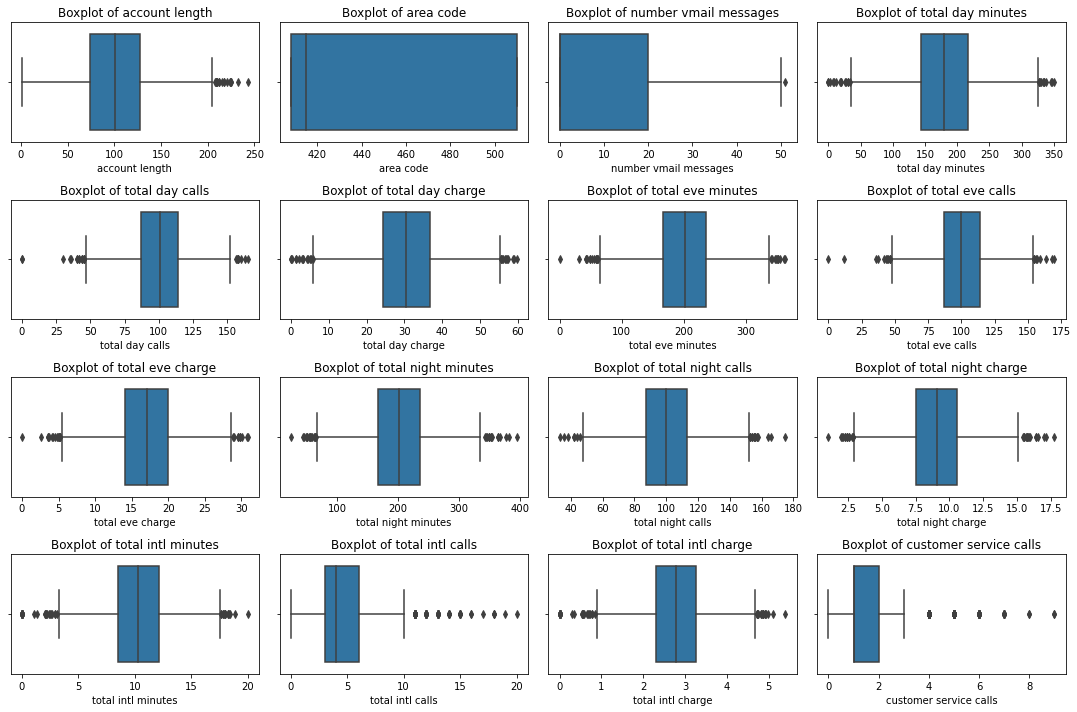

In [8]:
#Checking for outliers
numeric_columns = df[['account length','area code','number vmail messages','total day minutes','total day calls','total day charge',
                      'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                      'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']]

# Creating subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Looping through each column and plotting in the respective subplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])  
    axes[i].set_title(f'Boxplot of {col}')  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

- All the numerical columns depicts to have outliers **except the Area Code Column**. The cell below involves dropping outliers to enhance the performance my models by reducing overfitting and underfitting. By removing extreme values, I aim to improve the model's ability to generalize, ensuring it performs well on unseen data. Additionally, outliers can introduce bias in the analysis, leading to skewed conclusions that may not reflect the true patterns in the data. This approach ensures more accurate predictions and more reliable insights.

In [9]:
#Dropping outliers
columns_to_check = df[['account length','number vmail messages','total day minutes','total day calls','total day charge',
                      'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                      'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']]

# Filtering outliers using IQR
def filter_outliers_iqr(df, columns):
    for col in columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[df[col].between(lower_bound, upper_bound)]
    return df

# Applying to specific columns
df= filter_outliers_iqr(df, columns_to_check)
print(df.shape)

(2796, 20)


**- Before dropping outliers the dataset had 3333 rows. After dropping the outliers the number of rows reduced to 2796.** resulting in a loss of **approximately 16%** of the dataset. While this reduction might seem significant, it was necessary to remove extreme values that could distort the model's performance and lead to biased conclusions. The remaining data should now provide a more accurate representation of the underlying patterns. 

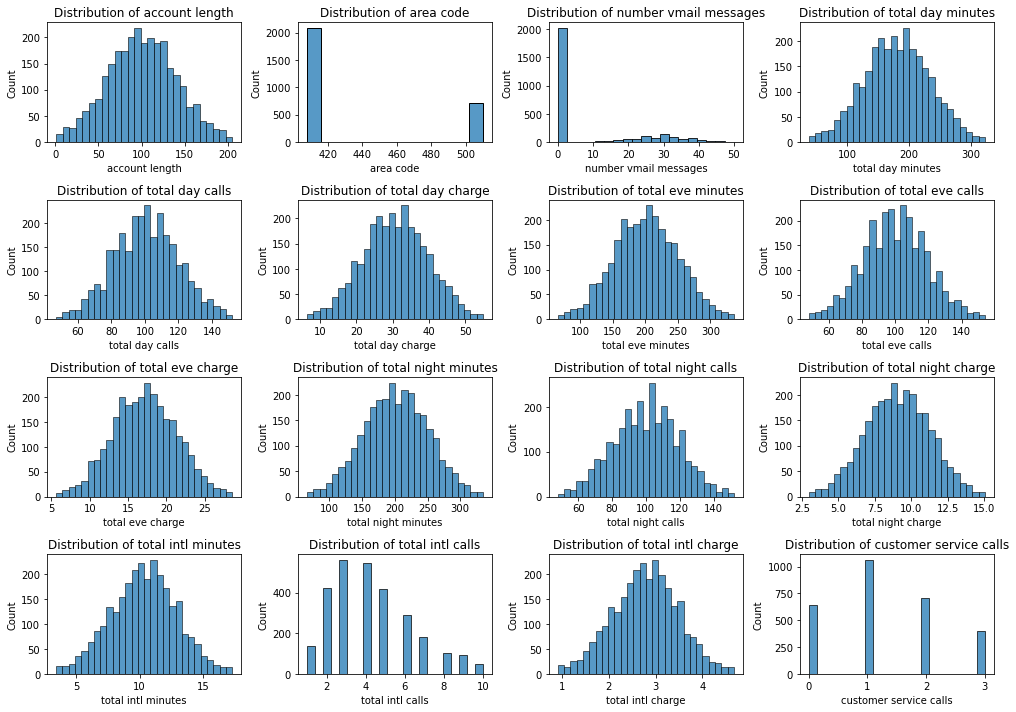

In [10]:
#Inspecting the distribution of my data
numeric_columns = df[['account length','area code','number vmail messages','total day minutes','total day calls','total day charge',
                      'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                      'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']]
# Create 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(14,10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Looping through each column and plotting in the respective subplot
for i, col in enumerate(numeric_columns):
    sns.histplot(x=df[col], ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Most of the columns in the dataset are normally distributed with an exception of the Area Code column, number of VMail Messages, total international Calls and customer Service calls.
1. For the Area Code column it's acceptable for the distribution to appear that way because Area codes are typically assigned geographically. The column had only three unique area codes (408, 415, and 510)so it's not surprising to see a limited number of them in a dataset.

2. The voicemail message distribution is right-skewed implying that most customers have a low number of messages, but a few customers have significantly higher usage.

3. The total international calls distribution appears to be right-skewed. This indicates that most customers have a smaller number of international calls, with a few having significantly higher numbers.

4. The distribution of the customer service calls appears to be right-skewed. This indicates that most customers have a smaller number of international calls, with a few having significantly higher numbers.

**Since the non-normally distributed columns are right skewed, we will apply log transformation to compress the range of this data.**

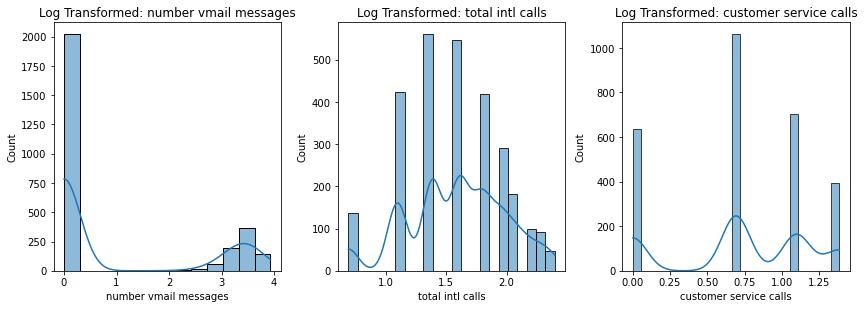

In [11]:
# Applying log transformation to the right-skewed column
skewed_columns=df[['number vmail messages','total intl calls','customer service calls']]

# Set up the plot size for easy comparison
plt.figure(figsize=(12, 8))

#Looping through each column
for col in skewed_columns:
    df[col] = np.log1p(df[col])

    # Plotting the original and transformed data for comparison
    plt.subplot(2, 3, skewed_columns.columns.get_loc(col) + 1)  # For arranging subplots
    sns.histplot(df[col], kde=True)
    plt.title(f"Log Transformed: {col}")

# Display the plots
plt.tight_layout()
plt.show()



After applying the log transformation, the **"total international calls" column approaches a normal distribution,** whereas the **"customer service calls" and "vmail messages" columns do not show significant improvement**. Further transformations will be explored to optimize these columns. Additionally, steps such as feature selection and scaling will be performed to ensure the dataset is prepared and ready for modeling.

## Exploratory Data Analysis

**1. To Identify Churn Rates by Region and which Region is highly affected**

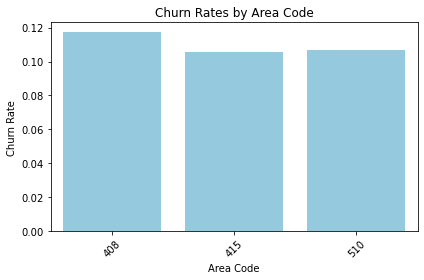

In [12]:
#Grouping the churn and area code
churn_rate_by_area_code = df.groupby('area code').churn.mean()

plt.figure(figsize=(6, 4))

# Creating a bar plot
sns.barplot(x=churn_rate_by_area_code.index, y=churn_rate_by_area_code.values,color='skyblue')

# Customizing the plot
plt.title('Churn Rates by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  
plt.tight_layout()  

#Save the plot image
plt.savefig('Churns by Region')

# Show the plot
plt.show()

**Findings**

- Area Code 408, presents to have the highest Churn Rate followed by 510 then 415. 

The high churn rate in the 408 region would indicate that many customers are leaving, often due to dissatisfaction with the product, service, or competition. It signals potential issues that need to be addressed, such as poor customer support, product quality, or regional service gaps. Immediate action is required to understand the cause and improve customer retention, as high churn can lead to lost revenue and increased acquisition costs.

**2. To examine the impact of Account Length on Churn. Which customesrs are highly prone to attrition.**

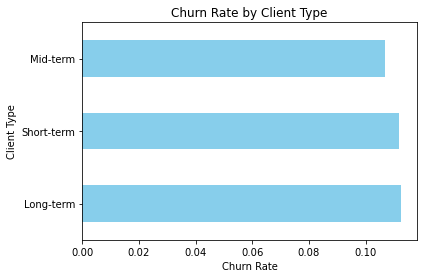

In [13]:
# Defining fixed thresholds based on account length range (1 to 243 months)
short_term_threshold = 81  # 33% of 243 months
long_term_threshold = 162  # 66% of 243 months

# Create a new column to classify clients based on account length into 3 groups
client_type = df['account length'].apply(
    lambda x: 'Short-term' if x <= short_term_threshold else 
              ('Mid-term' if x <= long_term_threshold else 'Long-term')
)

# Creating a new DataFrame with the client_type without modifying the original DataFrame
churn_by_client_type = df.assign(client_type=client_type).groupby('client_type')['churn'].mean()

# Sort churn_by_client_type in descending order
churn_by_client_type_sorted = churn_by_client_type.sort_values(ascending=False)

# Plot the churn rate by client type
churn_by_client_type_sorted.plot(kind='barh',color='skyblue',figsize=(6, 4))
plt.title('Churn Rate by Client Type')
plt.ylabel('Client Type')
plt.xlabel('Churn Rate')
plt.xticks(rotation=0)


#Save the plot image
plt.savefig('Churns by account length')

#Plot the figure
plt.show()

In [14]:
#Confirming the values for each client type
print(churn_by_client_type_sorted)

client_type
Long-term     0.112426
Short-term    0.111857
Mid-term      0.106751
Name: churn, dtype: float64


**Findings**

After grouping the account length column depending on the months the client has been a customer, I came up with three succinct groups.

**a).Short term (Customers who have been in the company for 7years and below)**
These customers present to have the second-highest churn rate, suggesting that short-term clients churn quickly due to unmet expectations or dissatisfaction with the initial service experience.

**b).Mid-term(Customers who have been in the company between 7 years and 14 years)**

These customers exhibit the lowest churn rate, which may indicate better retention in this segment compared to long-term and short-term clients.

**c).Long-term(Customers who have been in the company for more than 14 years with the maximum been 21 years)**

This group presents to have the highest churn, which may suggest that long-term clients are dissatisfied maybe due to lack of innovation or feeling undervalued after prolonged use.

- Given that long-term clients exhibit the highest churn rate, efforts to reduce churn should prioritize them, as they may be dissatisfied with factors such as lack of innovation or price increases, while short-term clients also show notable churn, likely due to unmet expectations.

**3.To assess the influence of subscription plans (voicemail and international plans) on churn.**

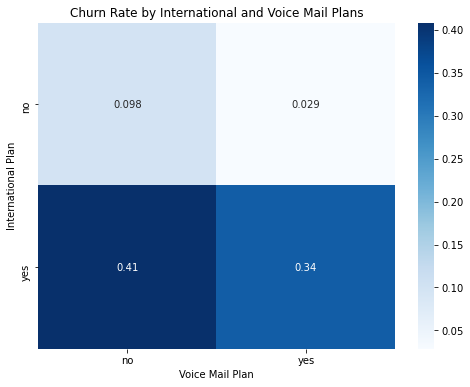

In [15]:
#Grouping subsription by churn
subscription_by_churn=df.groupby(['international plan', 'voice mail plan']).churn.mean()

# Reshape the data into a pivot table
subscription_by_churn_pivot = subscription_by_churn.unstack()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subscription_by_churn_pivot, annot=True,cmap="Blues",cbar=True)

# Customize plot labels and title
plt.title("Churn Rate by International and Voice Mail Plans")
plt.xlabel("Voice Mail Plan")
plt.ylabel("International Plan")

#Save the plot image
plt.savefig('Churns by subscription plans')

#Plot the figure
plt.show()

**Findings**

**a). International Plan, No Voicemail Plan: This quadrant shows the highest churn rate,** indicating that customers with an International Plan but no Voicemail Plan are the most likely to churn.

**b). International Plan, Voicemail Plan: The churn rate here is 2nd highest** suggesting that customers with both an International Plan and a Voicemail Plan still have a significant likelihood of churning.

**c). No International Plan, No Voicemail Plan: This group has the 3rd churn rate**  meaning customers without either plan are somewhat less likely to churn than those with International Plans, but still have a notable churn risk.

**d). No International Plan, Voicemail Plan: This quadrant has the least churn rate,** indicating that customers with a Voicemail Plan but no International Plan are the least likely to churn.


- The findings suggest that International Plan customers, particularly those without a Voicemail Plan, may be a key focus for retention efforts.It appears that these customers have the highest churn rates. This suggests that International Plans may indeed have the biggest problem when it comes to customer retention. This could be a key area for improvement, and targeted strategies focused on enhancing the appeal of these plans (e.g., adding more benefits, offering bundle deals, or improving customer support) to help reduce churn in this segment.

**4.To evaluate the impact of customer service calls on churn and determine if there is a statistically significant relationship.**

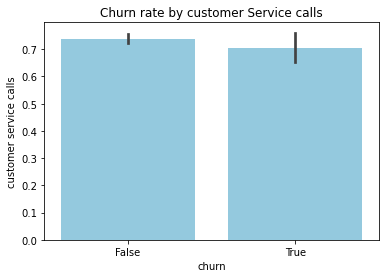

In [16]:
# Plotting a bar plot for Customer Service Calls vs Churn
sns.barplot(x='churn', y='customer service calls', color='skyblue',data=df)
plt.title('Churn rate by customer Service calls')

#Save the plot image
plt.savefig('Churns by customer service')

plt.show()

**_Interpretation_**

- Both customers who churn (True) and those who don't churn (False) seem to have a relatively high number of customer service calls, with values around 0.7.

- The error bars indicate the variability or uncertainty in the mean value for each group. The overlap in the error bars suggests that there is no significant difference in customer service call frequencies between churned and non-churned customers.

**The below cell expands on this by performing a t-test to confirm if there is a statistically significant relationship between customer service calls and churn rates.**

**Null Hypothesis (H₀):** There is no statistical significance in customer service calls and churn rate.

**Alternative Hypothesis (H₁):** There is a statistical significance in customer service calls and churn rate.

In [17]:
# Splitting data into churned and non-churned groups
churned = df[df['churn'] == True]['customer service calls']
not_churned = df[df['churn'] == False]['customer service calls']

# Perform T-Test (works well with normally distributed data)
t_stat, p_value = ttest_ind(churned, not_churned)

# Perform Mann-Whitney U Test (if the data is non-normal, the customer service call was skewed)
u_stat, p_value = mannwhitneyu(churned, not_churned)

# Print results
print(f"T-Test p-value: {p_value}")

print(f"Mann-Whitney U-Test p-value: {p_value}")

T-Test p-value: 0.3824618666327664
Mann-Whitney U-Test p-value: 0.3824618666327664


**Interpretation**

- The **P-values** for both T-test and Mann-Whitney tests presents to be **>than 0.05.** So, we **fail to reject the null hypothesis** and conclude that there is no statistically significant relationship between customer service calls and churn rate. In other words, the frequency of customer service calls does not have a significant impact on whether a customer churns or not.

## Modeling

- This section focuses on utilizing **Logistic Regression and Decision Trees** as the primary models to predict customer churn at SyriaTel. The target variable is categorical, which is why these models perform well, as they are specifically suited for handling categorical data, particularly binary outcomes like churn prediction.

**Feature Engineering**

In [18]:
#Dealing with categorical columns
#Inspecting the categorical and boolean columns
df[['state','international plan', 'voice mail plan','churn']]

,state,international plan,voice mail plan,churn
0,KS,no,yes,False
2,NJ,no,no,False
4,OK,yes,no,False
5,AL,yes,no,False
7,MO,yes,no,False
...,...,...,...,...
3328,AZ,no,yes,False
3329,WV,no,no,False
3330,RI,no,no,False
3331,CT,yes,no,False


- The international plan,	voice mail plan and	churn columns **have binary values. Therefore, label encoding will apply for these columns, while the state column will involve creating dummies.**

In [19]:
# Applying label encoding to the binary columns

#Instantiating encoder
label_encode=LabelEncoder()

#Applying labelencoder to each column
df['international plan']=label_encode.fit_transform(df['international plan'])
df['voice mail plan']=label_encode.fit_transform(df['voice mail plan'])
df['churn']=label_encode.fit_transform(df['churn'])

#Confirming the changes

df[['international plan', 'voice mail plan','churn']]


,international plan,voice mail plan,churn
0,0,1,0
2,0,0,0
4,1,0,0
5,1,0,0
7,1,0,0
...,...,...,...
3328,0,1,0
3329,0,0,0
3330,0,0,0
3331,1,0,0


- The label encoding assigned a unique integer based on alphabetical ordering of the text values, where **no was replaced with 0** and **yes replaced with 1** for the **international plan and voice mail plan columns**


- For the **Churn column, False was replaced with 0 while True was replaced with 1**


In [20]:
# Getting dummies for the state column
#The values of the state column before creating dummies
df['state'].sort_values(ascending=True)

2222    AK
1094    AK
2571    AK
3283    AK
657     AK
        ..
3258    WY
609     WY
608     WY
653     WY
856     WY
Name: state, Length: 2796, dtype: object

- The AK was the Top state alphabetically with WY being the last state alphabetically.

In [21]:
# Getting dummies for the state column
df= pd.get_dummies(df,columns=['state'],drop_first=True)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,3.258097,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0.000000,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0.000000,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
5,118,510,1,0,0.000000,223.4,98,37.98,220.6,101,...,0,0,0,0,0,0,0,0,0,0
7,147,415,1,0,0.000000,157.0,79,26.69,103.1,94,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Confirming the columns after creating dummies
df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'stat

- From the dummies created, the first column, AK was the one dropped. So it will be used as a **reference column.**

**1. Logistic Regression**

**Baseline Model using Logistic Regression**

- This is a simple version of the model that does not include any advanced techniques like feature selection or class imbalance handling, providing a reference for comparing improvements made in subsequent models.

In [23]:
#Defining variables
X=df.drop(columns=['churn'], axis=1)
y=df['churn']

#Splitting the data into train and test splits, 70/30 split
X_train, X_test, y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.3)

#Scaling the features
scaler=StandardScaler()

#Fitting on the training data and transforming both the train and test data
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#Convert the scaled features into a dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Train Logistic Regression model
Baseline_model = LogisticRegression(random_state=42)
Baseline_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

**Second Logistic Regression Model**

- This second model builds on the baseline model by incorporating feature selection and addressing class imbalance.

In [24]:
#Checking for class Imbalance in the target variable
df['churn'].value_counts()

0    2492
1     304
Name: churn, dtype: int64

- The churn column portrays to **have a class imbalance with the True Values only being 10% of the target variable and the False values accounting for the remaining 90%.**

In [25]:
# Addressing Class Imbalance
# Appling SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# Display class distribution
y_smote.value_counts()

0    1754
1    1754
Name: churn, dtype: int64

- The **SMOTE method portrays to have equalized the ratio of the classes,** which could lead to overfitting by generating synthetic samples that might not represent the true distribution. Therefore, **I'll use the class weights option to addres the class imbalance issue,** because it allows the model to pay more attention to the minority class without altering the original dataset, reducing the risk of overfitting and maintaining the natural class distribution.

In [26]:
# Initializing logistic regression model
log_reg_model = LogisticRegression(penalty='l2', solver='liblinear',class_weight='balanced',random_state=42)

# Initializing RFE and specify the number of features to select
rfe = RFE(estimator=log_reg_model, n_features_to_select=30)

# Fit and transform the RFE model to the training data
X_rfe_train=rfe.fit_transform(X_train_scaled_df,  y_train)

#Transforming the test data
X_rfe_test=rfe.transform(X_test_scaled_df)

# Fitting the model using the selected features
log_reg_model.fit(X_rfe_train, y_train)

# Getting the names of the selected features
selected_features = X_train_scaled_df.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day charge',
       'total eve minutes', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'state_CT', 'state_DC', 'state_LA', 'state_ME', 'state_MT', 'state_NC',
       'state_NH', 'state_NJ', 'state_NY', 'state_OH', 'state_OK', 'state_PA',
       'state_SC', 'state_TX', 'state_WI'],
      dtype='object')


- The above code applies **feature selection using Recursive Feature Elimination (RFE) with a logistic regression model  to select the top 30 features which accounts for half of the model's features.**

- Additionally, class weights are adjusted to handle the class imbalance (L2 regularization and balanced class weights), ensuring that the model doesn’t overfit to the majority class. his process ensures that the most relevant features are retained, improving the model's ability to predict churn effectively.

**2. Decision Trees Model**

**Baseline Model using Decision Tree**

- This is a reference model trained on the scaled features of the training dataset without any hyperparameter tuning.

In [27]:
# Perform an 70/30 split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

#Scaling the data
scaler= StandardScaler()
xtrain_scaled=scaler.fit_transform(X_train)
xtest_scaled=scaler.transform(X_test)

#Convert the scaled features into a dataframe
xtrain_scaled_df = pd.DataFrame(xtrain_scaled, columns=X_train.columns)
xtest_scaled_df = pd.DataFrame(xtest_scaled, columns=X_test.columns)

# Train a DT classifier
baseline_dtc=DecisionTreeClassifier(random_state=42)
baseline_dtc.fit(xtrain_scaled_df,y_train)

DecisionTreeClassifier(random_state=42)

**second Decision Tree Model**

- This model builds on the baseline decision tree by using entropy as the criterion for splitting, addressing class imbalance, and incorporating feature selection to enhance performance.

In [28]:
# Initialize the DecisionTreeClassifier with the chosen hyperparameters
decision_model = DecisionTreeClassifier(
    criterion='entropy',        
    class_weight='balanced',    
    max_depth=20,               
    min_samples_leaf=2,         
    max_features='sqrt',        
    random_state=42             
)

# Initializing RFE and the number of features to select
rfe = RFE(estimator=decision_model, n_features_to_select=30)

# Fit and transform the RFE model to the training data
Xrfe_train = rfe.fit_transform(xtrain_scaled_df, y_train)

# Transforming the test data using the same features selected by RFE
Xrfe_test = rfe.transform(xtest_scaled_df)

# Fitting the decision tree model using the selected features
decision_model.fit(Xrfe_train, y_train)

# Get the names of the selected features
selected_features = xtrain_scaled_df.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NJ',
       'state_NV', 'state_NY', 'state_OH', 'state_OK'],
      dtype='object')


- The model highlighted the **most significant features, with call charges, call minutes, and the number of calls being the dominant predictors** for customer churn.

**Model Evaluation**
- This section evaluates the performance of the trained models on the test data using the Classification Report, Confusion Matrix, ROC Curve, and Cross-Validation Score.

**_a).Confusion Matrix_**

c:\Users\user\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


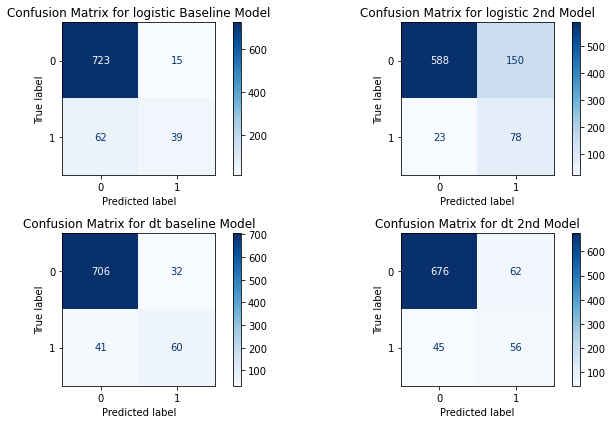

In [29]:
#Creating confusion matrix for all the models
# Predictions for logistic regression models
y_pred_baseline = Baseline_model.predict(X_test_scaled_df)  
y_pred_second_model = log_reg_model.predict(X_rfe_test)  

#Predictions for decision tree models
y_pred_baseline_dt = baseline_dtc.predict(xtest_scaled_df)  
y_pred_second_model_dt = decision_model.predict(Xrfe_test) 


# Confusion Matrix for logistic regression models
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
cm_second_model = confusion_matrix(y_test, y_pred_second_model)

# Confusion Matrix for decision tree models
dt_baseline = confusion_matrix(y_test, y_pred_baseline_dt)
dt_second_model = confusion_matrix(y_test, y_pred_second_model_dt)

#Displaying the confusion Matrices
fig, axes=plt.subplots(2,2,figsize=(10,6))

disp1=ConfusionMatrixDisplay(confusion_matrix=cm_baseline)
disp1.plot(cmap='Blues',ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix for logistic Baseline Model')


disp1=ConfusionMatrixDisplay(confusion_matrix=cm_second_model)
disp1.plot(cmap='Blues',ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix for logistic 2nd Model')


disp1=ConfusionMatrixDisplay(confusion_matrix=dt_baseline)
disp1.plot(cmap='Blues',ax=axes[1,0])
axes[1,0].set_title('Confusion Matrix for dt baseline Model')


disp1=ConfusionMatrixDisplay(confusion_matrix=dt_second_model)
disp1.plot(cmap='Blues',ax=axes[1,1])
axes[1,1].set_title('Confusion Matrix for dt 2nd Model')

#Display the matrices
plt.tight_layout()

# #Save the plot image
plt.savefig('Confusion matrix')

#Plot the figure
plt.show()

**Interpretation**

**Logistic Regression Models:**

-The second logistic model has a higher number of True Positives (78) but also a higher False Positive rate (150). This indicates that it may incorrectly classify a higher number of non-churn customers as churn, which could be problematic, depending on the cost of false positives.
The first logistic model has fewer false positives and false negatives, but its True Positives (39) are lower, which suggests it may be under-predicting churn.


**Decision Tree Models:**

-Both decision tree models (baseline and second model) perform similarly, with a relatively higher True Positive (60) rate and fewer False Positives compared to logistic regression.
The decision tree models seem to strike a better balance between identifying churn customers correctly and avoiding false positives.

**b).Classification Metrics**

In [30]:
#Creating Classification report for all the models

# Classification Report for logistic models
print("Classification Report (logistic Baseline Model):\n", classification_report(y_test, y_pred_baseline))
print("Classification Report (logistic Second Model):\n", classification_report(y_test, y_pred_second_model))

# Classification Report for decision tree models
print("Classification Report (dt Baseline Model):\n", classification_report(y_test, y_pred_baseline_dt))
print("Classification Report (dt Second Model):\n", classification_report(y_test, y_pred_second_model_dt))

Classification Report (logistic Baseline Model):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       738
           1       0.72      0.39      0.50       101

    accuracy                           0.91       839
   macro avg       0.82      0.68      0.73       839
weighted avg       0.90      0.91      0.90       839

Classification Report (logistic Second Model):
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       738
           1       0.34      0.77      0.47       101

    accuracy                           0.79       839
   macro avg       0.65      0.78      0.67       839
weighted avg       0.89      0.79      0.82       839

Classification Report (dt Baseline Model):
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       738
           1       0.65      0.59      0.62       101

    accuracy                           0

**Interpretation**

**Logistic Baseline Model** performs well for non-churn customers(high recall and precision for class 0)but has difficulty identifying churn.This suggests a high number of false negatives (failing to predict churn).

**Logistic Second Model** improves churn prediction compared to the baseline model but at the cost of misclassifying more non-churn customers as churn (lower recall for class 0). 

**Decision Tree Models (both baseline and second)** perform well for non-churn customers, but their performance in detecting churn is still not optimal, with relatively low recall for churn.


**c).Cross Validation Score**

In [31]:
# For Baseline Model (with all features)
baselinelogistic_cv_scores = cross_val_score(Baseline_model, X_train_scaled_df, y_train, cv=5, scoring='recall')

# For Second Model (with L2 regularization and feature selection)
secondlogistic_cv_scores = cross_val_score(log_reg_model, X_rfe_train, y_train, cv=5, scoring='recall')

#Computing for the baseline decision tree
baselinedt_cv_scores = cross_val_score(baseline_dtc, xtrain_scaled_df, y_train, cv=5, scoring='recall')

#Computing for the 2nd decision tree(with feature selection)
seconddt_cv_scores = cross_val_score(decision_model, Xrfe_train, y_train, cv=5, scoring='recall')

# Compare the cross-validation scores
print("Logistic Baseline Model CV Scores: ", baselinelogistic_cv_scores.mean())
print("Second Logistic Model CV Scores: ", secondlogistic_cv_scores.mean())
print("Baseline Decision Tree Model CV Scores: ", baselinedt_cv_scores.mean())
print("Second Decision Tree Model CV Scores: ", seconddt_cv_scores.mean())

Logistic Baseline Model CV Scores:  0.34987804878048784
Second Logistic Model CV Scores:  0.8225609756097562
Baseline Decision Tree Model CV Scores:  0.6596341463414633
Second Decision Tree Model CV Scores:  0.5069512195121952


**Interpretation**

- The Second Logistic Model has the highest validation score based on recall, as the primary focus is to identify as many churners as possible. This model outperforms the others by identifying a significantly higher proportion of churners.

**d).Roc-curve**

c:\Users\user\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


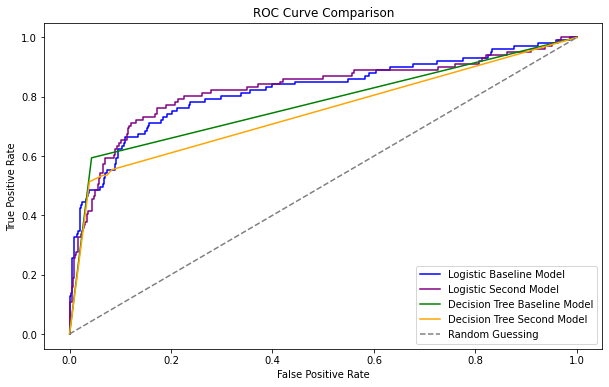

In [32]:
# First calculate the probability scores of each of the datapoints:
#For logistic models
y_score_baseline = Baseline_model.decision_function(X_test_scaled_df)
y_score_baseline_second_model= log_reg_model.decision_function(X_rfe_test)

#For decision Tree models
y_score_dt_baseline = baseline_dtc.predict_proba(xtest_scaled_df)[:, 1]
y_score_dt_second_model= decision_model.predict_proba(Xrfe_test)[:, 1]

#Calculating the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the models

fpr_baseline, tpr_baseline, thresholdslg = roc_curve(y_test, y_score_baseline)
fpr_second_model, tpr_second_model,thresholdssm = roc_curve(y_test, y_score_baseline_second_model)
fpr_dtbaseline, tpr_dtbaseline, thresholdsdt = roc_curve(y_test, y_score_dt_baseline)
fpr_dtsecond_model, tpr_dtsecond_model,thresholdssdt = roc_curve(y_test, y_score_dt_second_model)

# Plot ROC Curve for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_baseline, tpr_baseline, color='blue', label='Logistic Baseline Model')
plt.plot(fpr_second_model, tpr_second_model, color='purple', label='Logistic Second Model')
plt.plot(fpr_dtbaseline, tpr_dtbaseline, color='green', label='Decision Tree Baseline Model')
plt.plot(fpr_dtsecond_model, tpr_dtsecond_model, color='orange', label='Decision Tree Second Model')
plt.plot([0, 1], [0, 1],color='gray', linestyle='--',label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# #Save the plot image
plt.savefig('ROC Curve')

#Plot the figure
plt.show()

In [33]:
# Print the AUC values
print('AUC for Logistic Baseline Model: {}'.format(auc(fpr_baseline, tpr_baseline)))
print('AUC for 2nd Logistic Model: {}'.format(auc(fpr_second_model, tpr_second_model)))
print('AUC for Decision Tree Baseline Model: {}'.format(auc(fpr_dtbaseline, tpr_dtbaseline)))
print('AUC for 2nd Decision Tree Model: {}'.format(auc(fpr_dtsecond_model, tpr_dtsecond_model)))

AUC for Logistic Baseline Model: 0.8206820682068208
AUC for 2nd Logistic Model: 0.8256728111835574
AUC for Decision Tree Baseline Model: 0.775349486168129
AUC for 2nd Decision Tree Model: 0.7457940916042824


**Interpretation**

- Logistic Baseline Model: Performs well but is outperformed by the logistic second model, showing room for improvement in feature selection or tuning.

- Logistic Second Model: The best-performing model, achieving the highest TPR and lowest FPR, indicating effective optimization for churn prediction.

- Decision Tree Baseline Model: Provides moderate performance, but its ROC curve suggests it struggles with generalization compared to the logistic models.

- Decision Tree Second Model: Shows slight improvement over the baseline decision tree, but still lags behind the logistic models in predictive power.

**Conclusion and Model Ranking**

**- Second Logistic Regression Model:** The second logistic regression model is the best for churn prediction, with the highest recall, identifying the most churners, although at the cost of more false positives.

**- Logistic Baseline Model:** The logistic baseline model performs well in differentiating between churn and non-churn customers but has a lower recall, missing many churners.

**- Decision Tree Baseline Model:** The decision tree baseline model strikes a balance between precision and recall but still fails to capture as many churners as the logistic models.

**- Decision Tree Second Model:** The decision tree second model underperforms in churn detection, with the lowest recall, indicating it misses a significant number of churners.


**Final Model**

**5. To predict churn by focusing on the most influential features that drive customer behavior and retention patterns**

- Based on the analysis of the models, **the second logistic regression model is the best choice for predicting customer churn at Syria Tel. While it has a slightly higher False Positive rate, its superior recall score indicates that it is more effective at identifying churners, which is the primary goal for this business problem.** By capturing more churners (True Positives), the model offers a better chance to retain high-risk customers, which is more cost-effective than failing to identify churners and losing them to competitors.


- Although the higher False Positive rate poses a risk of misclassifying non-churn customers as churners, the financial cost of reaching out to false positives is generally lower than the cost of not addressing actual churners. This trade-off makes this model more suitable for improving customer retention, which is crucial for SyriaTel’s profitability and long-term growth. 


- This final model achieves the stated objective by optimizing the most critical features influencing churn prediction​,such as account details, usage metrics, customer service interactions, and geographic information. Given its potential, it should be prioritized for further tuning to optimize its accuracy and enhance customer retention strategies.

## Conclusion

1. The highly affected region for churn is 408, which has the leading churn rate

2. The churn rate analysis based on account length shows that long-term customers (over 14 years) have the highest churn rate, followed by short-term customers (7 years or less) with the second-highest churn rate, while mid-term customers (7-14 years) exhibit the lowest churn rate.

3. The findings reveal that customers with an International Plan but no Voicemail Plan have the highest churn rate, followed by those with both plans, while customers without either plan have the third-highest churn rate, and those with only a Voicemail Plan have the lowest churn rate.

4. The analysis indicates that the average number of customer service calls is relatively high for both churners and non-churners, with no statistically significant relationship between customer service calls and churn rate.

5. Based on the analysis, the second logistic regression model stands out as the most effective for predicting customer churn at SyriaTel.It meets the success criteria achieving a 77% recall. While it has a slightly higher False Positive rate, its superior recall score ensures it effectively identifies churners, a critical aspect for enhancing retention strategies. The model highlights key factors influencing churn, including call charges, account length, geographic region, subscription options, and the number of calls/minutes relative to charges.

## Recommendations

1. SyriaTel should conduct further research to identify the factors driving the high churn rate in the 408 region, which differs from others, and develop targeted strategies for improving customer retention.

2. SyriaTel should focus on retaining long-term customers by addressing potential dissatisfaction and innovating offerings, while improving short-term customer satisfaction through better onboarding and support. Mid-term customers should be engaged with loyalty programs to maintain their retention.

3. SyriaTel should focus on retaining International Plan customers, especially those without a Voicemail Plan, by offering cost-effective strategies like enhancing plan benefits, bundling services, and improving customer support.

4. Since customer service calls are not significantly related to churn rate, S SyriaTel should shift focus to improving other key aspects of the customer experience, such as product quality, pricing, and service offerings, to enhance customer retention and reduce churn.

5. Based on the findings, SyriaTel should prioritize further tuning and optimization of the second logistic regression model, as its superior recall score makes it more effective at identifying churners, thereby enhancing customer retention strategies and reducing churn.

## Next Steps

1. Deploy the logistic regression model into SyriaTel's customer retention system. Integrate the model's predictions into real-time operations, such as CRM systems, to trigger automated retention actions like personalized offers or loyalty programs for at-risk customers.The model should also be continuously updated with new customer data to maintain its predictive power and accuracy over time.

2. There is a need for a deep dive into the 408 region to gather customer feedback or detailed insights into regional challenges. Further qualitative analysis may be needed to understand if factors like service quality, local competition, or pricing are impacting retention.

3. Implement a feedback loop to gather insights from customers who churn and those who stay, continuously improving the customer experience and identifying pain points that were not previously addressed. Additionally, a structured process is needed for collecting and acting on customer feedback.